In [1]:
import numpy as np
import matplotlib.pyplot as plt
from kepler3 import *

2006.7214236824093
Tp in years is 2006.6114236824094 yr
x shape (101,)
y shape (101,)
x shape (101,)
y shape (101,)
x shape ()
y shape ()
x shape ()
y shape ()
3.3472352082168566 AU


Text(0, 0.5, 'y [au]')

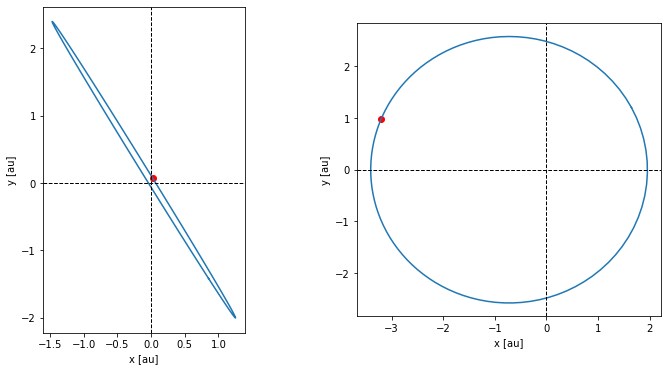

In [69]:
fig, (ax1,ax2) = plt.subplots(1,2,figsize=(12,6))
    # testing kep3d()
    # HD 80606b
    # NOTE: numbers in Table C.4 don't agree with numbers in Triangle plot in Fig 5.
P = 3.30 * u.yr # Lagrange2020 from Fig 5
Tp = -0.11 * u.yr
a = 2.68 * u.au
e = 0.27
i = 89.01 * u.deg
w = -71.9 * u.deg
anode = -148.24 * u.deg


# Tp, expressed in yr, corresponds to the time of periastron passage since JDB = 2 454 000.

# what is JD 2454000 in decimal years?
from astropy.time import Time

t0 = Time(2454000., format='jd')
print(t0.jyear)
Tperi = (t0.jyear)*u.year + Tp
print('Tp in years is {}'.format(Tperi))

ep2 = np.linspace(2020,2020.+P.value, 101) * u.year

X, Y, Xs, Ys, Zs, Xv, Yv, Zv = kep3d(ep2,P,Tperi,a,e,i,w,anode)

proj_sep = np.sqrt(Xs*Xs+Ys*Ys)

ax1.plot(Xs, Ys)
ax2.plot(X,Y)


X, Y, Xs, Ys, Zs, Xv, Yv, Zv = kep3d(2021.2*u.year,P,Tperi,a,e,i,w,anode)
ax1.set_aspect('equal')
ax2.set_aspect('equal')
ax1.scatter(Xs, Ys,color='red')
ax2.scatter(X,Y, color='red')
print(Zs)

ax2.axvline(x=0., linestyle='--', color='black',lw=1)
ax2.axhline(y=0., linestyle='--', color='black',lw=1)
ax2.set_xlabel('x [au]')
ax2.set_ylabel('y [au]')

ax1.axvline(x=0., linestyle='--', color='black',lw=1)
ax1.axhline(y=0., linestyle='--', color='black',lw=1)
ax1.set_xlabel('x [au]')
ax1.set_ylabel('y [au]')
#ax.set_title('RV of HD 80606 star (-ve of planet)')


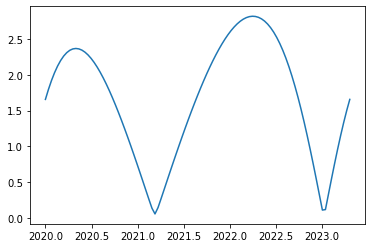

In [70]:
plt.plot(ep2, proj_sep)